<a href="https://colab.research.google.com/github/Arnaud-dd/KTH_AI_course/blob/main/Hand_in_assingment_1_Arnaud_Dupont_de_Dinechin__Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand in assignement 1 : XGBoost Bike sharing

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)



In [12]:


from sklearn.model_selection import train_test_split
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [14]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'colsample_bylevel': [0.6, 1]

}


grid_search = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bylevel': 1, 'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.938514937121262


In [15]:
best_xgb = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    colsample_bylevel=best_params['colsample_bylevel'],
    objective='reg:squarederror',
    random_state=42
)

best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 27.03135889766457
Mean Squared Error: 1848.774569593242
R-squared: 0.9416153306852917


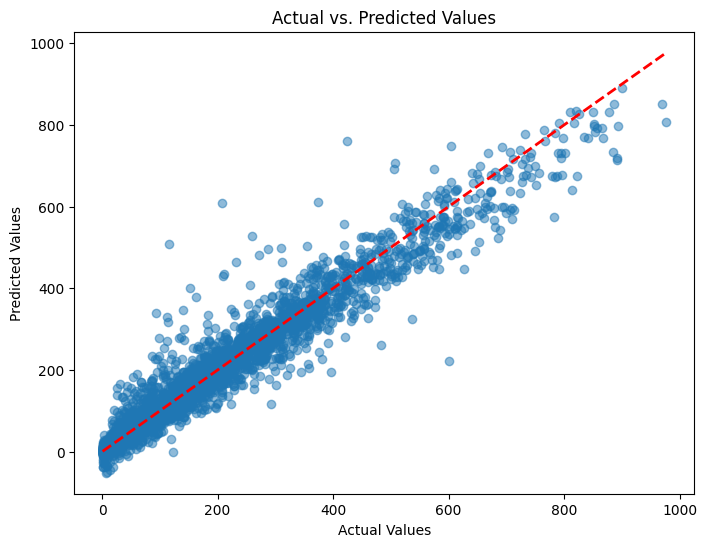

In [17]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()